# Ejemplo 3.7

Nota: a este documento lo podremos ejecutar de manera dinámica si tienen instalado:

- Python 3.5 o más nuevo instalado.
- [Jupyter Notebook](https://jupyter.readthedocs.io/en/latest/install.html).


Ejecutar este documento en forma dinámica: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rirastorza/ejemplosODE/blob/master/Sistemas_no_lineales/ejemplo3_7.ipynb)

La visualización del mismo es óptima utilizando Jupyter Notebook.

### Referencias

- Naón, C. M., Rossignoli, R., & Santángelo, E. M. (2014). Ecuaciones diferenciales en Física. Editorial de la Universidad Nacional de La Plata (EDULP).

- Edwards, C. H., & Penney, D. E. (2008). Elementary differential equations. Pearson Higher. Edición 6.


Autovalores: [-2. -4.]
Autovectores: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


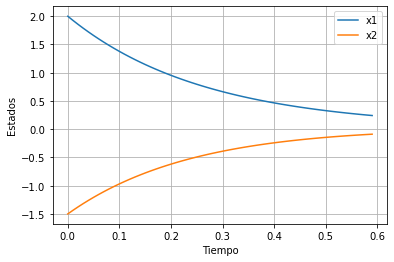

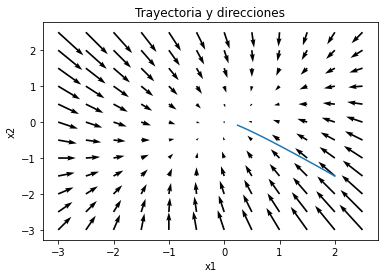

In [1]:
"""
Created on Sat Sep 03 10:13:41 2016

Ejemplo 3.7, diagrama de fase y dibujo de estados nodo estable

@author: Ramiro Irastorza
"""
import matplotlib.pyplot as plt
import numpy as np
import pylab as p
import scipy.integrate as integrate

def df1(x1, x2):
    return a11*x1 + a12*x2

def df2(x1, x2):
    return a21*x1 + a22*x2

def derivs(state, t):
    x1, x2 = state  
    deltaf1 = df1(x1, x2)  
    deltaf2 = df2(x1, x2) 
    return deltaf1, deltaf2


#Sistema del ejemplo2.7
a11, a12 = -3.0, 1.0
a21, a22 = 1.0, -3.0

x10 = 2.0
x20 = -1.5

t = np.arange(0.0, 0.6, 0.01)

y0 = [x10, x20]
y = integrate.odeint(derivs, y0, t)
x1 = y[:,0]  
x2 = y[:,1] 

p.figure()
p.plot(t, x1, label='x1')
p.plot(t, x2, label='x2')
p.xlabel('Tiempo')
p.ylabel('Estados')
#p.title('Estados')
p.grid()
p.legend()
p.savefig('ejemplo2.7_estados.png', dpi=150)

p.figure()
p.plot(x1, x2)
p.xlabel('x1')
p.ylabel('x2')
p.title('Plano de fase')
X1, X2 = np.meshgrid(np.arange(-3.0, 3.0, .5), np.arange(-3.0, 3.0, .5))
dX1 = df1(X1, X2)
dX2 = df2(X1, X2)
p.quiver(X1, X2, dX1, dX2)
X1, X2 = np.meshgrid(np.arange(-3.0, 3.0, .01), np.arange(-3.0, 3.0, .01))
dX1 = df1(X1, X2)
dX2 = df2(X1, X2)
p.ylabel('x2')
p.title('Trayectoria y direcciones')
w,v = np.linalg.eig([[a11,a12],[a21,a22]])
print('Autovalores:',w)
print('Autovectores:',v)

p.savefig('ejemplo2.7_planodefase.png', dpi=150)

p.show()